
Final value estimates after 10000 episodes:

TD(0):
[[0.015 0.011 0.023 0.01 ]
 [0.027 0.    0.034 0.   ]
 [0.06  0.101 0.143 0.   ]
 [0.    0.197 0.421 0.   ]]


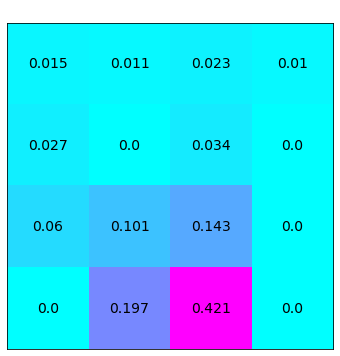


TD(lambda):
[[0.01  0.002 0.006 0.002]
 [0.021 0.    0.023 0.   ]
 [0.092 0.146 0.192 0.   ]
 [0.    0.108 0.4   0.   ]]


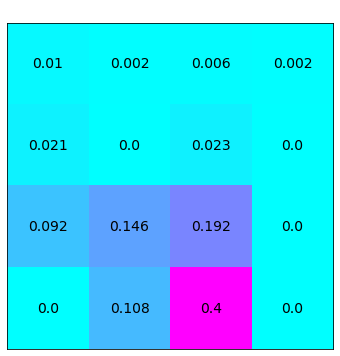

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict
from plot_utils import plot_values

env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n   # 16 states
gamma = 0.9999

def run_episode(env):
    states = []
    rewards = []

    # s, _ = env.reset()
    s = env.reset()
    done = False

    while not done:
        states.append(s)

        # fixed random policy
        a = env.action_space.sample()

        s_next, r, done, _ = env.step(a)
        rewards.append(r)

        s = s_next

    return states, rewards


# -----------------------------
# TD(0)
# -----------------------------

def td0_update(V, states, rewards, alpha=0.1):
    for t in range(len(states)):
        s = states[t]
        r = rewards[t]
        if t < len(states) - 1:
            s_next = states[t+1]
            target = r + gamma * V[s_next]
        else:
            target = r  # terminal target
        V[s] += alpha * (target - V[s])


# -----------------------------
# TD(λ) with eligibility traces
# -----------------------------

def td_lambda_update(V, states, rewards, lam=0.9, alpha=0.1):
    E = defaultdict(float)
    for t in range(len(states)):
        s = states[t]
        r = rewards[t]

        if t < len(states)-1:
            s_next = states[t+1]
            delta = r + gamma * V[s_next] - V[s]
        else:
            delta = r - V[s]

        E[s] += 1

        # update all traces
        for s_i in E:
            V[s_i] += alpha * delta * E[s_i]
            E[s_i] *= gamma * lam

# -------------------
# Run comparison
# -------------------
episodes = 10000

V_td0 = np.zeros(n_states)
V_tdl = np.zeros(n_states)

for ep in range(episodes):
    states, rewards = run_episode(env)
    td0_update(V_td0, states, rewards)
    td_lambda_update(V_tdl, states, rewards, lam=0.90)

print(f"\nFinal value estimates after {episodes} episodes:\n")
print("TD(0):")
print(np.round(V_td0, 3).reshape(4, 4))

plot_values(V_td0, (6,6))

print("\nTD(lambda):")
print(np.round(V_tdl, 3).reshape(4, 4))

plot_values(V_tdl, (6,6))